In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
binary_target = np.array([1.0 if x == 0 else 0.0 for x in iris.target])
iris2 = np.array([[x[2], x[3]] for x in iris.data])
iris2

In [5]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(iris2, binary_target)

SVC(kernel='linear')

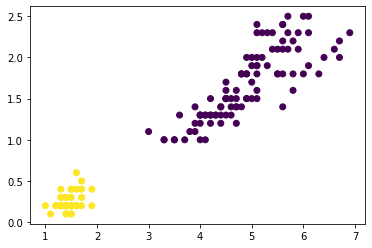

In [7]:
plt.scatter(iris2[:,0], iris2[:,1], c=svm.predict(iris2));

In [8]:
svm.score(iris2, binary_target)

1.0

In [9]:
svm.support_vectors_

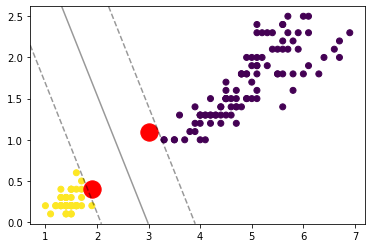

In [12]:
def plt_svc(svm, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)

    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = svm.decision_function(xy).reshape(X.shape)

    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.4, linestyles=["--", "-", "--"])


    if plot_support:
        ax.scatter(svm.support_vectors_[:,0],
                   svm.support_vectors_[:,1],
                   s=300, linewidth=1, facecolors = "red");


    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(iris_2d[:,0], iris_2d[:,1], c=binary_target)
plt_svc(svm, plot_support=True)

In [13]:
array=np.hstack((iris.data, iris.target.reshape(-1,1)))
import pandas as pd
data=pd.DataFrame(array)
data.columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'species']

In [14]:
svm = SVC(kernel='linear')
svm.fit(data[['petal length', 'petal width']], data['species'])

SVC(kernel='linear')

In [15]:
svm.score(data[['petal length', 'petal width']], data['species'])

0.9666666666666667

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel': ['linear', 'rbf', 'sigmoid'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(SVC(), param_grid, verbose=2)
grid.fit(data[['petal length', 'petal width']], data['species'])

Fitting 5 folds for each of 147 candidates, totalling 735 fits
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.001, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...............C=0.001, gamma=0.001, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             verbose=2)

In [17]:
grid.best_estimator_

SVC(C=0.001, gamma=0.001, kernel='linear')

In [18]:
grid.best_score_

0.9666666666666668

In [19]:
X=iris.data[:,0:2]
Y=iris.target

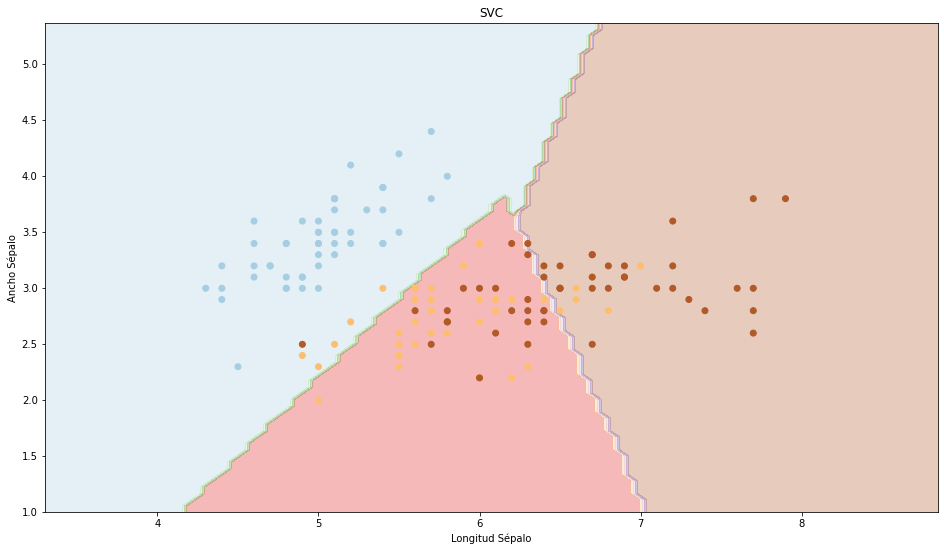

In [23]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max - x_min) / 100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
x_plot = np.c_[xx.ravel(), yy.ravel()]
svc=SVC(kernel='linear', C=0.001, gamma=0.001,decision_function_shape='ovr').fit(X,Y)
Ypred=svc.predict(x_plot)
Ypred=Ypred.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.contourf(xx, yy, Ypred, cmap=plt.cm.Paired, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Longitud Sépalo')
plt.ylabel('Ancho Sépalo')
plt.xlim(xx.min(), xx.max())
plt.title('SVC')
plt.show()